<a href="https://colab.research.google.com/github/rifat01-rahman/Project-of-Python/blob/main/Taitanic_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Survival Prediction on the Titanic: A Comprehensive Machine Learning Approach**

**Model Building and Evaluation**

In this project, three powerful supervised machine learning algorithms were applied to predict passenger survival on the Titanic dataset: Support Vector Classifier (SVC), Random Forest Classifier (RF), and Extreme Gradient Boosting (XGBoost). Each model was trained on the balanced dataset obtained through the SMOTE (Synthetic Minority Oversampling Technique) to handle class imbalance between survivors and non-survivors.

Before model training, the numerical features were standardized using StandardScaler, while categorical features were label encoded. To ensure robust performance estimation, Stratified K-Fold Cross-Validation was used during hyperparameter tuning via GridSearchCV.

**Support Vector Classifier (SVC):**
The SVC model was tuned primarily for the regularization parameter C and kernel choice. SVC works effectively on smaller to medium-sized datasets and is capable of handling non-linear relationships using the kernel trick. It attempts to find the optimal decision boundary that maximizes the margin between classes.

**Random Forest Classifier (RF):**
The Random Forest algorithm, an ensemble of decision trees, was optimized by tuning parameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf. This model captures complex non-linear interactions and reduces overfitting through averaging predictions across multiple trees.

**Extreme Gradient Boosting (XGBoost):**
XGBoost, a highly efficient and regularized gradient boosting algorithm, was fine-tuned with parameters including learning_rate, max_depth, and n_estimators. It uses sequential tree-building and gradient descent optimization to minimize classification error, often outperforming other models on tabular datasets.

**Model Selection and Conclusion**

Based on our comparative analysis of the three machine learning models — Support Vector Classifier (SVC), Random Forest (RF), and XGBoost — it was observed that all models achieved competitive classification performance on the Titanic dataset. However, XGBoost consistently outperformed the others in terms of overall accuracy, F1-score, and generalization ability across cross-validation folds.

The superior performance of XGBoost can be attributed to its boosting framework, which builds trees sequentially by learning from the errors of previous iterations. This approach allows the model to handle both linear and non-linear feature relationships more effectively. Moreover, XGBoost integrates several regularization techniques that help in preventing overfitting — a common issue in ensemble models like Random Forests.

While SVC performed adequately after data standardization, it was slightly less robust when dealing with complex feature interactions. Random Forest, though reliable, demonstrated marginally lower recall for the minority (survived) class compared to XGBoost.

Considering its higher predictive accuracy, better balance between bias and variance, and stronger capability to model complex relationships, XGBoost was selected as the final model for predicting passenger survival on the Titanic dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('/content/test(1).csv')

In [ ]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df1 = pd.read_csv ('/content/train.csv')

In [ ]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
tita_df = pd.concat ([df, df1], axis=0, ignore_index=True)

In [ ]:
len (tita_df)

1309

In [ ]:
tita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
tita_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [ ]:
# EDA methods
# 1) There is not any missing values in Sex column
# 2) 263 missing values in Age column
# 3) No missing values in SibSp column
# 4) No missing values in Parch column
# 5) 1 missing values in Fare column
# 6) 1014 missing values in Cabin column
# 7) 2 missing values in Embarked column
# 8) no missing values in Pclass column
# 8) 418 missing values in target variables

Univariate Analysis :

Age : There are few outliers and not fully normally distributed.

Fare: There are also outliers and not normally distributed.

Sex: male 843, female 466

Survived: 0 (no) -549, 1 (yes)- 342

Embarked: S-914, C-270, Q-123


In [ ]:
tita_df ['Survived'].isnull().sum()

np.int64(418)

In [ ]:
tita_df ['Survived'] .value_counts ()

,count
Survived,
0.0,549
1.0,342


In [ ]:
tita_df ['Age'] .describe()

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [ ]:
tita_df ['Embarked'].value_counts()

,count
Embarked,
S,914
C,270
Q,123


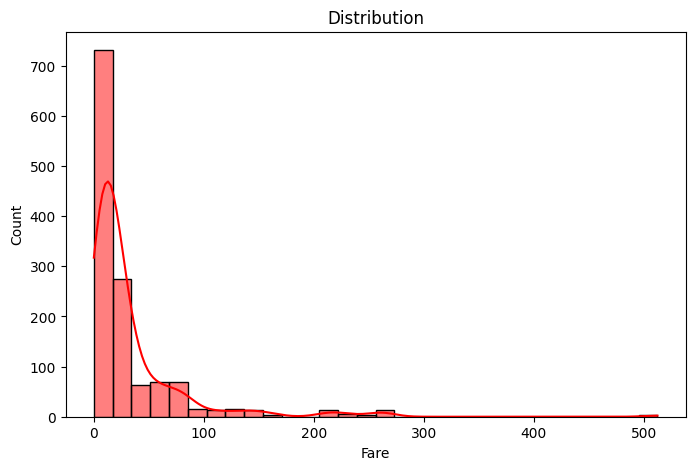

In [ ]:
# To see Distribution
plt.figure (figsize= (8,5))
sns.histplot (tita_df ['Fare'], kde=True, bins=30, color='red')
plt.title ('Distribution')
plt.show()

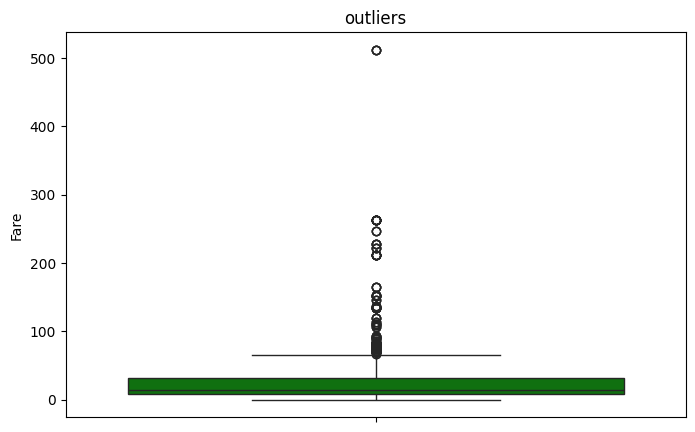

In [ ]:
# To see outliers
plt.figure (figsize = (8,5))
sns.boxplot (tita_df ['Fare'], color= 'green')
plt.title ('outliers')
plt.show()

Multivariate Analysis:

**Sex and Survive**
1) female have more chance to survive as Female 25% chance to die and 75% chance to live
2) Male have less chance to survive as Male 82% chnace to die and 18% chance to live

**Pclass and Survive**

1) Upper class has more survival rate (0-37%, 1-63%)
2) Middle class survival rate (0-52%, 1-48%)
3) Lower class survival rate (0-75%, 1-25%)

**Age and Survived**

Where age between (0-10) survive percentage 62% as age increases survival ration has been declined.

**Embarked and Survived**

from C survival per%- 56
from Q survival per%- 39
From S survival per%- 34


In [ ]:
pd.crosstab (tita_df ['Embarked'], tita_df ['Survived'], normalize= 'index')*100

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [ ]:
tita_df ['Age_group'] = pd.cut(tita_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], right=False)

In [ ]:
# Feature Engineering
# We have created family size new column
# We have created individual fare column

In [ ]:
tita_df ['family_size'] = tita_df ['SibSp'] + tita_df ['Parch'] + 1

In [ ]:
tita_df ['per_fare'] = tita_df ['Fare']/tita_df['family_size']

In [ ]:
tita_df ['Pclass'].isnull().sum()

np.int64(0)

**Missing values fill for Survived Column**

For survived missing values Sex column (Male- 266) and (Female-152)

for survived missing vales Pclass column (3-218, 1-107, 2-93)

**Missing Values fill for Age column**

for survived missing vales Pclass column (3-208, 1-39, 2-16)

for survived missing vales Survived column (0.0-211, 1.0-52)

for survived missing vales Sex column (male-185, female-78)

In [ ]:
missing_survival = tita_df [tita_df ['Age']. isnull()]

In [ ]:
missing_survival.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_group,family_size,per_fare
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,NaN,NaN,1,7.8958
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,NaN,NaN,1,31.6833
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,NaN,NaN,3,7.2264
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,4,5.8625
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,NaN,NaN,1,8.0500


In [ ]:
missing_survival ['Sex']. value_counts ()

,count
Sex,
male,185
female,78


In [ ]:
pd.crosstab (missing_survival ['Pclass'], missing_survival ['Sex'], normalize= 'index')*100

Sex,female,male
Pclass,,
1,28.205128,71.794872
2,18.750000,81.250000
3,30.769231,69.230769


In [ ]:
# Fill missing values for Survived Column
mask = (
    (tita_df['Pclass'] == 1) &
    (tita_df['Sex'] == 'female') &
    (tita_df['Age'].between(0, 25, inclusive='both'))
)

tita_df.loc[tita_df['Survived'].isna() & mask, 'Survived'] = 1.0
tita_df.loc[tita_df['Survived'].isna() & ~mask, 'Survived'] = 0.0


In [ ]:
tita_df["Survived"].isnull().sum()

np.int64(0)

In [ ]:
# Fill missing Age values conditionally
tita_df.loc[tita_df['Age'].isna() & (tita_df['Survived'] == 1.0), 'Age'] = np.random.uniform(10, 30,
    size=tita_df.loc[tita_df['Age'].isna() & (tita_df['Survived'] == 1.0)].shape[0])

tita_df.loc[tita_df['Age'].isna() & (tita_df['Survived'] == 0.0), 'Age'] = np.random.uniform(50, 80,
    size=tita_df.loc[tita_df['Age'].isna() & (tita_df['Survived'] == 0.0)].shape[0])

In [ ]:
tita_df['Age'].isnull().sum()

np.int64(0)

In [ ]:
# Missing values filling for Fare column
tita_df['Sex'] = tita_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
X = tita_df[['Pclass', 'Sex', 'Age', 'per_fare']]

In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
tita_df['per_fare'] = X_imputed[:, 3]

In [ ]:
tita_df['per_fare'].isnull().sum()

np.int64(0)

In [ ]:
# Fill missing values for Embark column
# Calculate the mode
mode_value = tita_df['Embarked'].mode()[0]

# Fill missing values
tita_df['Embarked'].fillna(mode_value, inplace=True)

/tmp/ipython-input-3889711853.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tita_df['Embarked'].fillna(mode_value, inplace=True)


In [ ]:
tita_df ['Survived'].value_counts ()

,count
Survived,
0.0,959
1.0,350


In [ ]:
tita_df['Title'] = tita_df['Name'].str.extract(r',\s*([^\.]+)\.') # I extract the title of the Name

In [ ]:
tita_df['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Dr,8
Rev,8
Col,4
Ms,2
Mlle,2


In [ ]:
tita_df['Title'] = tita_df['Title'].replace(['Dr', 'Rev', 'Col', 'Ms', 'Mlle', 'Major', 'Don', 'Dona','Lady', 'Mme','Sir', 'Capt', 'the Countess','Jonkheer' ], 'others')


In [ ]:
tita_df ['Title']. value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
others,34


In [ ]:
pd.crosstab (tita_df ['Title'], tita_df ['Survived'], normalize= 'index')*100

Survived,0.0,1.0
Title,,
Master,62.295082,37.704918
Miss,50.000000,50.000000
Mr,89.299868,10.700132
Mrs,47.208122,52.791878
others,64.705882,35.294118


In [ ]:
tita_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_group,family_size,per_fare,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0.0,"[30, 40)",1,7.829200,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0.0,"[40, 50)",2,3.500000,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0.0,"[60, 70)",1,9.687500,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0.0,"[20, 30)",1,8.662500,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0.0,"[20, 30)",3,4.095833,Mrs


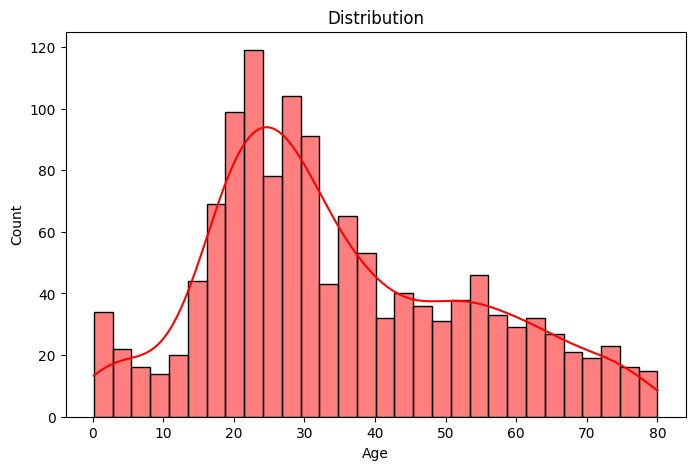

In [ ]:
plt.figure (figsize= (8,5))
sns.histplot (tita_df ['Age'], kde=True, bins=30, color='red')
plt.title ('Distribution')
plt.show()

In [ ]:
tita_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_group,family_size,per_fare,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0.0,"[30, 40)",1,7.829200,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0.0,"[40, 50)",2,3.500000,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0.0,"[60, 70)",1,9.687500,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0.0,"[20, 30)",1,8.662500,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0.0,"[20, 30)",3,4.095833,Mrs


In [ ]:
tita_df ['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
others,34


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tita_df['Embarked_encoded'] = le.fit_transform(tita_df['Embarked']) # Where Q =1, S=2, C=0
tita_df['Title_encoded'] = le.fit_transform(tita_df['Title']) # Where Mr=2, Mrs=3, others=4, Miss=1, Master=0

In [ ]:
from sklearn.preprocessing import StandardScaler
# Continuous columns
continuous_vars = ['Age', 'family_size', 'per_fare']
scaler = StandardScaler()
tita_df[continuous_vars] = scaler.fit_transform(tita_df[continuous_vars])

In [ ]:
final_df = tita_df.copy()

In [ ]:
final_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_group,family_size,per_fare,Title,Embarked_encoded,Title_encoded
0,892,3,"Kelly, Mr. James",0,-0.028920,0,0,330911,7.8292,NaN,Q,0.0,"[30, 40)",-0.558346,-0.354660,Mr,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0.643910,1,0,363272,7.0000,NaN,S,0.0,"[40, 50)",0.073352,-0.475760,Mrs,2,3
2,894,2,"Myles, Mr. Thomas Francis",0,1.451307,0,0,240276,9.6875,NaN,Q,0.0,"[60, 70)",-0.558346,-0.302678,Mr,1,2
3,895,3,"Wirz, Mr. Albert",0,-0.432618,0,0,315154,8.6625,NaN,S,0.0,"[20, 30)",-0.558346,-0.331350,Mr,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.701751,1,1,3101298,12.2875,NaN,S,0.0,"[20, 30)",0.705051,-0.459093,Mrs,2,3


In [ ]:
# Now we have to make balance data as our trarget variable is imbalance data
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

In [ ]:
X = final_df [['Pclass', 'Sex', 'Age', 'family_size', 'per_fare', 'Embarked_encoded', 'Title_encoded']]
y = final_df ['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
categorical_features = [X.columns.get_loc(col) for col in ['Sex', 'Embarked_encoded', 'Pclass','Title_encoded']]

In [ ]:
# Initialize SMOTENC
smote_nc = SMOTENC(
    categorical_features=categorical_features,
    random_state=42,
    k_neighbors=5,
    sampling_strategy='auto'
)

In [ ]:
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [ ]:
print("Before:", y_train.value_counts())
print("After:", y_train_res.value_counts())

Before: Survived
0.0    767
1.0    280
Name: count, dtype: int64
After: Survived
0.0    767
1.0    767
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# We are gonna run Support Vector Classifier model
svc = SVC(probability=True, random_state=42)

param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=cv, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train_res,y_train_res )
print("Best SVC params:", grid_svc.best_params_)
print("Best CV Accuracy:", grid_svc.best_score_)

Best SVC params: {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Accuracy: 0.812252240744289


In [ ]:
best_svc = grid_svc.best_estimator_
y_pred = best_svc.predict(X_test)

print("\nClassification Report (Support Vector Classifier):")
print(classification_report(y_test, y_pred))


Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83       192
         1.0       0.53      0.66      0.59        70

    accuracy                           0.76       262
   macro avg       0.70      0.72      0.71       262
weighted avg       0.78      0.76      0.76       262



In [ ]:
roc_auc_score(y_test, best_svc.predict_proba(X_test)[:, 1])

np.float64(0.7763764880952381)

In [ ]:
# Randim Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': [None, 'balanced']
}

In [ ]:

grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)

print("Best RF params:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

Best RF params: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.8422303123203679


In [ ]:
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred))



Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       192
         1.0       0.61      0.64      0.62        70

    accuracy                           0.79       262
   macro avg       0.74      0.75      0.74       262
weighted avg       0.80      0.79      0.80       262



In [ ]:
roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

np.float64(0.7763764880952381)

In [ ]:
#XGboost modelling
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_dist_xgb = {
    'n_estimators': [100, 300, 500, 800],
    'learning_rate': np.linspace(0.01, 0.3, 5),
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': np.linspace(0.7, 1.0, 4),
    'colsample_bytree': np.linspace(0.7, 1.0, 4),
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=40,                  # tries 40 random combinations
    scoring='accuracy',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_res, y_train_res)
print("Best Parameters (XGBoost):", random_search_xgb.best_params_)
print("Best CV Accuracy:", random_search_xgb.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:12:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters (XGBoost): {'subsample': np.float64(0.7), 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': np.float64(0.22749999999999998), 'gamma': 0, 'colsample_bytree': np.float64(1.0)}
Best CV Accuracy: 0.8429009388771795


In [ ]:
best_xgb = random_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nClassification Report (XGboost):")
print(classification_report(y_test, y_pred))


Classification Report (XGboost):
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       192
         1.0       0.68      0.69      0.68        70

    accuracy                           0.83       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.83      0.83      0.83       262



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

np.float64(0.8571056547619048)